In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import galsim
import fpfs
import impt
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1 import ImageGrid

/work/xiangchong.li/miniconda3/envs/image/lib/python3.11/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/work/xiangchong.li/miniconda3/envs/image/lib/python3.11/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


# HSC like simulation using parametric galaxies from COSMOS

2023/09/20 02:03:58 ---  Creating Mixed galaxy profiles
2023/09/20 02:03:58 ---  Processing for g1-1, and shear is 0.02.
2023/09/20 02:03:58 ---  Making Basic Simulation. ID: 212


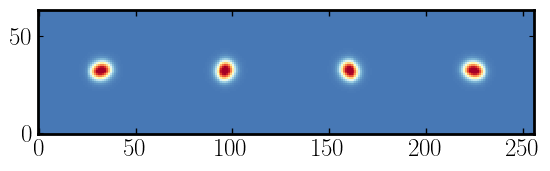

2023/09/20 02:04:00 ---  Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023/09/20 02:04:00 ---  Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023/09/20 02:04:00 ---  Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
2023/09/20 02:04:00 ---  No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
2023/09/20 02:04:00 ---  Order of the shear estimator: nnord=4
2023/09/20 02:04:00 ---  Shapelet kernel in configuration space: sigma= 0.7000 arcsec
2023/09/20 02:04:00 ---  Detection kernel in configuration space: sigma= 0.7000 arcsec


Input shear is: 0.020000
Estimated shear is: 0.019995


In [4]:
shear_value = 0.02
scale = 0.168
nx, ny = 64, 64
outDir='galaxy_basicCenter_psf60'
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)
psfData = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=nx, ny=ny, scale=scale).array

# Four Galaxies to cancel spin-2 and spin-4 ansiotropies
# spin-2 is shape noise in diagnonal elements of shear response matrix
# spin-4 is shape noise in diagnonal and of-diagnoal elements of shear response matrix, 
# but an order of magnitude smaller than spin-2
seed = 212
gname = "g1-1"
gal_data = fpfs.simutil.make_isolate_sim(
    gal_type="mixed",
    psf_obj=psfInt,
    gname=gname,
    seed=seed,
    ny=ny,
    nx=nx*4,
    scale=scale,
    do_shift=False,
    nrot=4,
)[0]

plt.close()
plt.imshow(gal_data,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(gal_data,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.3))
plt.show()
# Now we measure shear
rcut = 32

# Force detection at the stamp center point (ngrid//2, ngrid//2)
indX = np.arange(int(nx/2), nx*4, nx)
indY = np.arange(int(ny/2), ny, ny)
inds = np.meshgrid(indY, indX, indexing="ij")
coords = np.vstack([np.ravel(_) for _ in inds]).T

fpTask  =   fpfs.image.measure_source(psfData,pix_scale = scale, sigma_arcsec=0.7)
mms =  fpTask.measure(gal_data, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp

print('Input shear is: %.6f' %shear_value)
print('Estimated shear is: %.6f' %shear)

# HSC like simulation using parametric + Knots galaxies

2023/09/20 02:05:03 ---  Creating Mixed galaxy profiles
2023/09/20 02:05:03 ---  Processing for g1-1, and shear is 0.02.
2023/09/20 02:05:03 ---  Making Basic Simulation. ID: 212
2023/09/20 02:05:03 ---  Creating Mixed galaxy profiles
2023/09/20 02:05:03 ---  Processing for g1-1, and shear is 0.02.
2023/09/20 02:05:03 ---  Making galaxies with Random Knots.


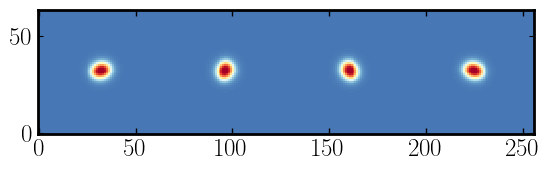

2023/09/20 02:05:04 ---  Order of the shear estimator: nnord=4
2023/09/20 02:05:04 ---  Shapelet kernel in configuration space: sigma= 0.7000 arcsec
2023/09/20 02:05:04 ---  Detection kernel in configuration space: sigma= 0.7000 arcsec


Input shear is: 0.020000
Estimated shear is: 0.019995


In [6]:
shear_value = 0.02
scale = 0.168
nx, ny = 64, 64
outDir='galaxy_basicCenter_psf60'
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)
psfData = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=nx, ny=ny, scale=scale).array

# Four Galaxies to cancel spin-2 and spin-4 ansiotropies
# spin-2 is shape noise in diagnonal elements of shear response matrix
# spin-4 is shape noise in diagnonal and of-diagnoal elements of shear response matrix, 
# but an order of magnitude smaller than spin-2
gname = "g1-1"
seed = 212
gal_data = fpfs.simutil.make_isolate_sim(
    gal_type="mixed",
    psf_obj=psfInt,
    gname=gname,
    seed=seed,
    ny=ny,
    nx=nx*4,
    scale=scale,
    do_shift=False,
    nrot=4,
)[0]

gal_data2 = fpfs.simutil.make_isolate_sim(
    gal_type="mixed",
    psf_obj=psfInt,
    gname=gname,
    seed=seed,
    ny=ny,
    nx=nx*4,
    scale=scale,
    do_shift=False,
    nrot=4,
    sim_method="mc",
)[0]

gal_data = gal_data * 0.7 + gal_data2 * 0.2

plt.close()
plt.imshow(gal_data,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(gal_data,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.3))
plt.show()
# Now we measure shear
rcut = 32

# Force detection
indX = np.arange(int(nx//2), nx*4, nx)
indY = np.arange(int(ny//2), ny, ny)
inds = np.meshgrid(indY, indX, indexing="ij")
coords = np.vstack(inds).T

fpTask  =   fpfs.image.measure_source(psfData,pix_scale = scale, sigma_arcsec=0.7)
mms =  fpTask.measure(gal_data, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp

print('Input shear is: %.6f' %shear_value)
print('Estimated shear is: %.6f' %shear)

# Simulation with extremely small pixel size

2023/09/20 02:05:44 ---  Creating Mixed galaxy profiles
2023/09/20 02:05:44 ---  Processing for g1-1, and shear is 0.02.
2023/09/20 02:05:44 ---  Making Basic Simulation. ID: 2


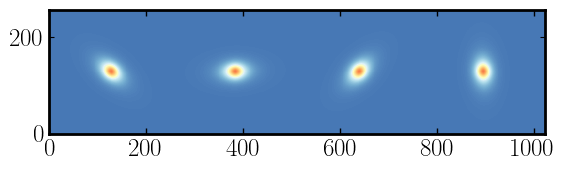

2023/09/20 02:05:46 ---  Order of the shear estimator: nnord=4
2023/09/20 02:05:46 ---  Shapelet kernel in configuration space: sigma= 0.7000 arcsec
2023/09/20 02:05:46 ---  Detection kernel in configuration space: sigma= 0.7000 arcsec


Input shear is: 0.020000
Estimated shear is: 0.020001


In [7]:
shear_value = 0.02
scale = 0.168/4
nx, ny = 256, 256
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)
psfData = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=nx, ny=ny, scale=scale).array

# Four Galaxies to cancel spin-2 and spin-4 ansiotropies
# spin-2 is shape noise in diagnonal elements of shear response matrix
# spin-4 is shape noise in diagnonal and of-diagnoal elements of shear response matrix, 
# but an order of magnitude smaller than spin-2

gname = "g1-1"
gal_data = fpfs.simutil.make_isolate_sim(
    gal_type="mixed",
    psf_obj=psfInt,
    gname=gname,
    seed=2,
    ny=ny,
    nx=nx*4,
    scale=scale,
    do_shift=False,
    nrot=4,
    ngrid=nx,
)[0]
plt.close()
plt.imshow(gal_data,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(gal_data,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.3))
plt.show()
# Now we measure shear
rcut = 32

# Force detection
indX = np.arange(int(nx//2), nx*4, nx)
indY = np.arange(int(ny//2), ny, ny)
inds = np.meshgrid(indY, indX, indexing="ij")
coords = np.vstack([np.ravel(_) for _ in inds]).T

fpTask  =   fpfs.image.measure_source(psfData,pix_scale = scale, sigma_arcsec=0.7)
mms =  fpTask.measure(gal_data, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp

print('Input shear is: %.6f' %shear_value)
print('Estimated shear is: %.6f' %shear)